In [6]:
# 데이터 구성: Series, DataFrame
import pandas as pd

# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# export_graphviz: 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz
# graphviz : 나무 구조 시각화 (.dot 확장자 파일 불러오기 등)
import graphviz


# 데이터 분할: train, test
from sklearn.model_selection import train_test_split
# 예측/회귀 Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

In [2]:
# 파일명, 변수, 값 등에 한글 포함시 engine = "python"으로 지정
df_raw= pd.read_csv("/home/pirl/test/BigData/DIABETES.csv", encoding='euc-kr')
df_raw.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [3]:
# 목표 변수, 설명변수 데이터 지정
df_raw_y = df_raw["Y"]
df_raw_x = df_raw.drop("Y", axis = 1, inplace = False)

In [4]:
# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: randomseed)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y
                                                               , test_size = 0.3, random_state = 1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data X size : {}".format(df_test_y .shape))

train data X size : (309, 10)
train data Y size : (309,)
test data X size : (133, 10)
test data X size : (133,)


In [7]:
gb_uncustomized = GradientBoostingRegressor(random_state = 1234)
gb_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.865
Score on test set: 0.451


### 모델 Parameter 조정
- n_estimators: 트리 수 변경에 따른 모델 성능

    Estimators  TrainScore  TestScore
0            5       0.348      0.312
1           10       0.504      0.430
2           15       0.584      0.477
3           20       0.639      0.494
4           25       0.679      0.503
5           30       0.707      0.500
6           35       0.732      0.493
7           40       0.751      0.487
8           45       0.765      0.483
9           50       0.778      0.480
10          55       0.790      0.477
11          60       0.802      0.472
12          65       0.810      0.471
13          70       0.825      0.465
14          75       0.832      0.464
15          80       0.841      0.462
16          85       0.846      0.463
17          90       0.852      0.459
18          95       0.859      0.456
19         100       0.865      0.451
20         105       0.874      0.450
21         110       0.880      0.452
22         115       0.885      0.452
23         120       0.891      0.448


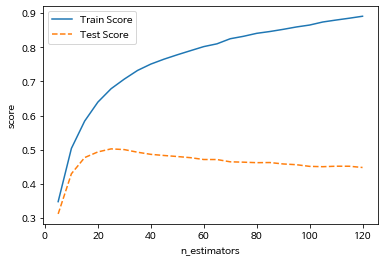

In [14]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# n_estimators: 트리 수 변경: 1~100
para_n_tree = [n_tree * 5 for n_tree in range(1,25)] #참조: para_n_tree: [10,20,30,...,100]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(n_estimators=v_n_estimators, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["Estimators"] = para_n_tree
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

# 모델 설명력 확인
print(df_score_leaf.round(3))

# 모델 설명력 그래프 확인
plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_n_tree, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()


    MinSamplesLeaf  TrainScore  TestScore
0                1       0.846      0.463
1                2       0.847      0.469
2                3       0.847      0.461
3                4       0.833      0.452
4                5       0.841      0.427
5                6       0.825      0.443
6                7       0.821      0.457
7                8       0.811      0.453
8                9       0.805      0.474
9               10       0.803      0.451
10              11       0.799      0.446
11              12       0.809      0.463
12              13       0.797      0.453
13              14       0.793      0.462
14              15       0.795      0.475
15              16       0.779      0.462
16              17       0.778      0.448
17              18       0.780      0.475
18              19       0.781      0.448
19              20       0.775      0.439


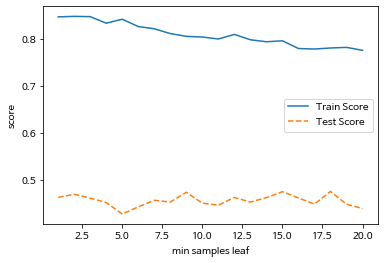

In [16]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# min_samples_leaf: 잎사귀 최소 자료 수
para_leaf = [n_leaf * 1 for n_leaf in range(1,21)] #참조: para_leaf: [1,2,3,...,20]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = 85,
                               min_samples_leaf = v_min_samples_leaf)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
      
# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

# 모델 설명력 확인
print(df_score_leaf.round(3))

     
# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

# 모델 설명력 그래프 확인
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

    MinSamplesSplit  TrainScore  TestScore
0                 2       0.805      0.474
1                 4       0.805      0.474
2                 6       0.805      0.474
3                 8       0.805      0.474
4                10       0.805      0.474
5                12       0.805      0.474
6                14       0.805      0.474
7                16       0.805      0.474
8                18       0.805      0.474
9                20       0.809      0.471
10               22       0.809      0.471
11               24       0.807      0.470
12               26       0.805      0.473
13               28       0.796      0.461
14               30       0.800      0.464
15               32       0.804      0.473
16               34       0.797      0.460
17               36       0.792      0.460
18               38       0.782      0.475
19               40       0.786      0.471
20               42       0.790      0.465
21               44       0.786      0.470
22         

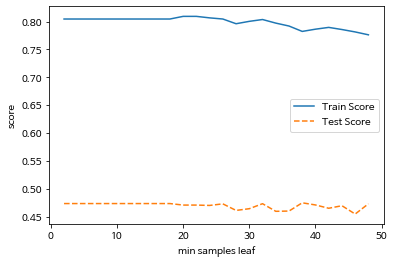

In [22]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# min_samples_leaf: 잎사귀 최소 자료 수
para_split = [n_split * 2 for n_split in range(1, 25)] #참조: para_leaf: [4,6,8,...,40]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = 85, min_samples_leaf = 9,
                               min_samples_split = v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
      
# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score


# 모델 설명력 확인
print(df_score_split.round(3))

# 모델 설명력 그래프 확인
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

   Depth  TrainScore  TestScore
0      1       0.571      0.527
1      2       0.688      0.496
2      3       0.805      0.473
3      4       0.870      0.422
4      5       0.919      0.416
5      6       0.947      0.403
6      7       0.959      0.407
7      8       0.963      0.396
8      9       0.974      0.383
9     10       0.976      0.397


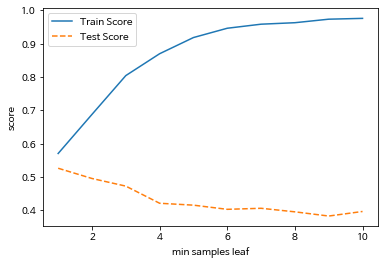

In [23]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# max_depth: 최대 깊이 변경
para_depth = [n_depth for n_depth in range(1,11)] # 참조: para+depth:[1,2,3, ...,10]

for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = 85, 
                               min_samples_leaf = 9, min_samples_split = 26,
                               max_depth = v_max_depth)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
      
# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["Depth"] = para_depth
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score

# 모델 설명력 확인
print(df_score_split.round(3))

# 모델 설명력 그래프 확인: 4개
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()


   LearningRate  TrainScore  TestScore
0           0.1       0.805      0.473
1           0.2       0.890      0.409
2           0.3       0.926      0.330
3           0.4       0.960      0.253
4           0.5       0.969      0.249
5           0.6       0.983      0.258
6           0.7       0.988      0.106
7           0.8       0.992      0.086
8           0.9       0.992      0.006
9           1.0       0.997      0.028


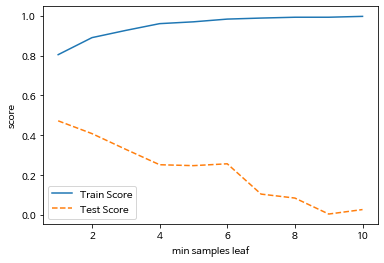

In [25]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []

# learning rate: 학습률 변경 -.1 ~0.9
para_lr = [lr * 0.1 for lr in range(1,11)] # 참조: para+depth:[0.1,0.2,0.3, ...,0.9]


for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = 85, 
                               min_samples_leaf = 9, min_samples_split = 26,
                               max_depth = 3, learning_rate = v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
      
# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["LearningRate"] = para_lr
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score

# 모델 설명력 확인
print(df_score_split.round(3))

# 모델 설명력 그래프 확인
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

In [27]:
gb_final = GradientBoostingRegressor(random_state = 1234, n_estimators = 86, min_samples_leaf = 9, 
                                     min_samples_split = 26, max_depth = 3, learning_rate = 0.1)
gb_final.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print("Score on training set: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(gb_final.score(df_test_x, df_test_y)))  

Score on training set: 0.806
Score on test set: 0.472


In [28]:
# 변수명 저장
v_feature_name = df_train_x.columns

# tree.feature_importances_로 설명변수 중요도 확인 및 데이블 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_

# feature_importances의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
2,BMI,0.369
8,LTG,0.248
3,BP,0.081
9,GLUCOSE,0.076
6,HDL,0.056
5,LDL,0.050
0,AGE,0.039
4,CHOLESTEROL,0.039
1,GENDER,0.025
7,TCH,0.017


Text(0, 0.5, '변수')

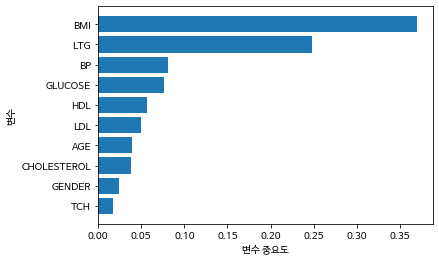

In [29]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

In [30]:
estimator = GradientBoostingRegressor(random_state = 1234)
# 구하고자 하는 parameter와 범위
param_grid = {"criterion": ["mse", "friedman_mse", "mae"], "max_features": ["auto", "sqrt", "log2"],"learning_rate": para_lr,
                            "max_depth": para_depth, "min_samples_leaf": para_leaf}

# 설명력이 높은 최적 parameter 찾기
grid_gb = GridSearchCV(estimator, param_grid, scoring = "r2", n_jobs = -1)
grid_gb.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_gb.best_estimator_))
print("\nbest parameter: \n{}".format(grid_gb.best_params_))
print("\nbest score: \n{}".format(grid_gb.best_score_.round(3)))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


best estimator model: 
GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=1,
                          max_features='auto', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=10, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=1234, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

best parameter: 
{'criterion': 'mse', 'learning_rate': 0.1, 'max_depth': 1, 'max_features': 'auto', 'min_samples_leaf': 10}

best score: 
0.437
